# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/german_credit_data.csv")
df_encoded = pd.read_csv("data/encoded_dataset.csv")

In [3]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [4]:
df['Risk'] = df['Risk'].replace('bad', True)
df['Risk'] = df['Risk'].replace('good', False)

How many unique values are in the dataset?

In [5]:
df.nunique()

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64

To get a good overview of the data, we will be using a library called sweetviz to generate a report. The report is interactive, and can be found in the GitHub repository!

In [6]:
import sweetviz as sv

sv.analyze(df, target_feat = 'Risk').show_html()

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# According to the dataset, how different is the Credit Risk for Men and Women?

In [7]:
males = df.loc[df['Sex'] == 'male']
females = df.loc[df['Sex'] == 'female']

In [8]:
maleRisks = males['Risk'].value_counts()
total = males.shape[0]

print('For males, ' + str(maleRisks[1]/total) + '% have bad credit risk.')

For males, 0.2768115942028985% have bad credit risk.


In [9]:
femaleRisks = females['Risk'].value_counts()
total = females.shape[0]

print('For females, ' + str(femaleRisks[1]/total) + '% have bad credit risk.')

For females, 0.35161290322580646% have bad credit risk.


# According to the dataset, how different is the Credit Risk for people of different ages?

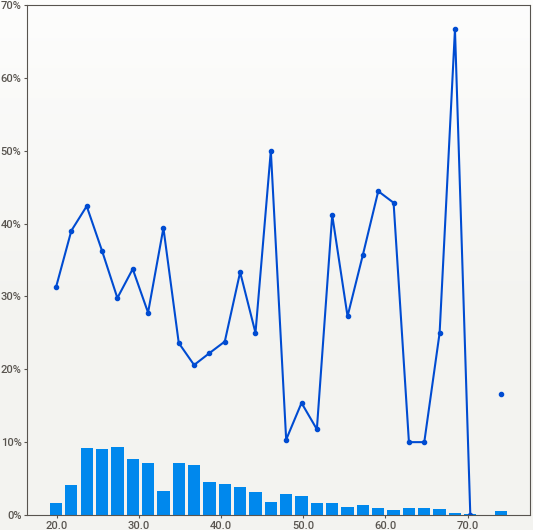

You can find this image in the sweetviz report that is attached.

# How correlated are the variables?

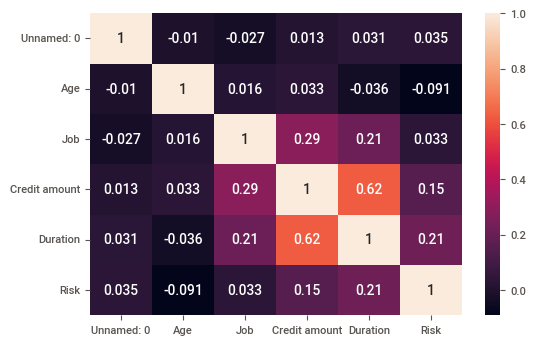

In [10]:
corr = df.corr()

_ = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

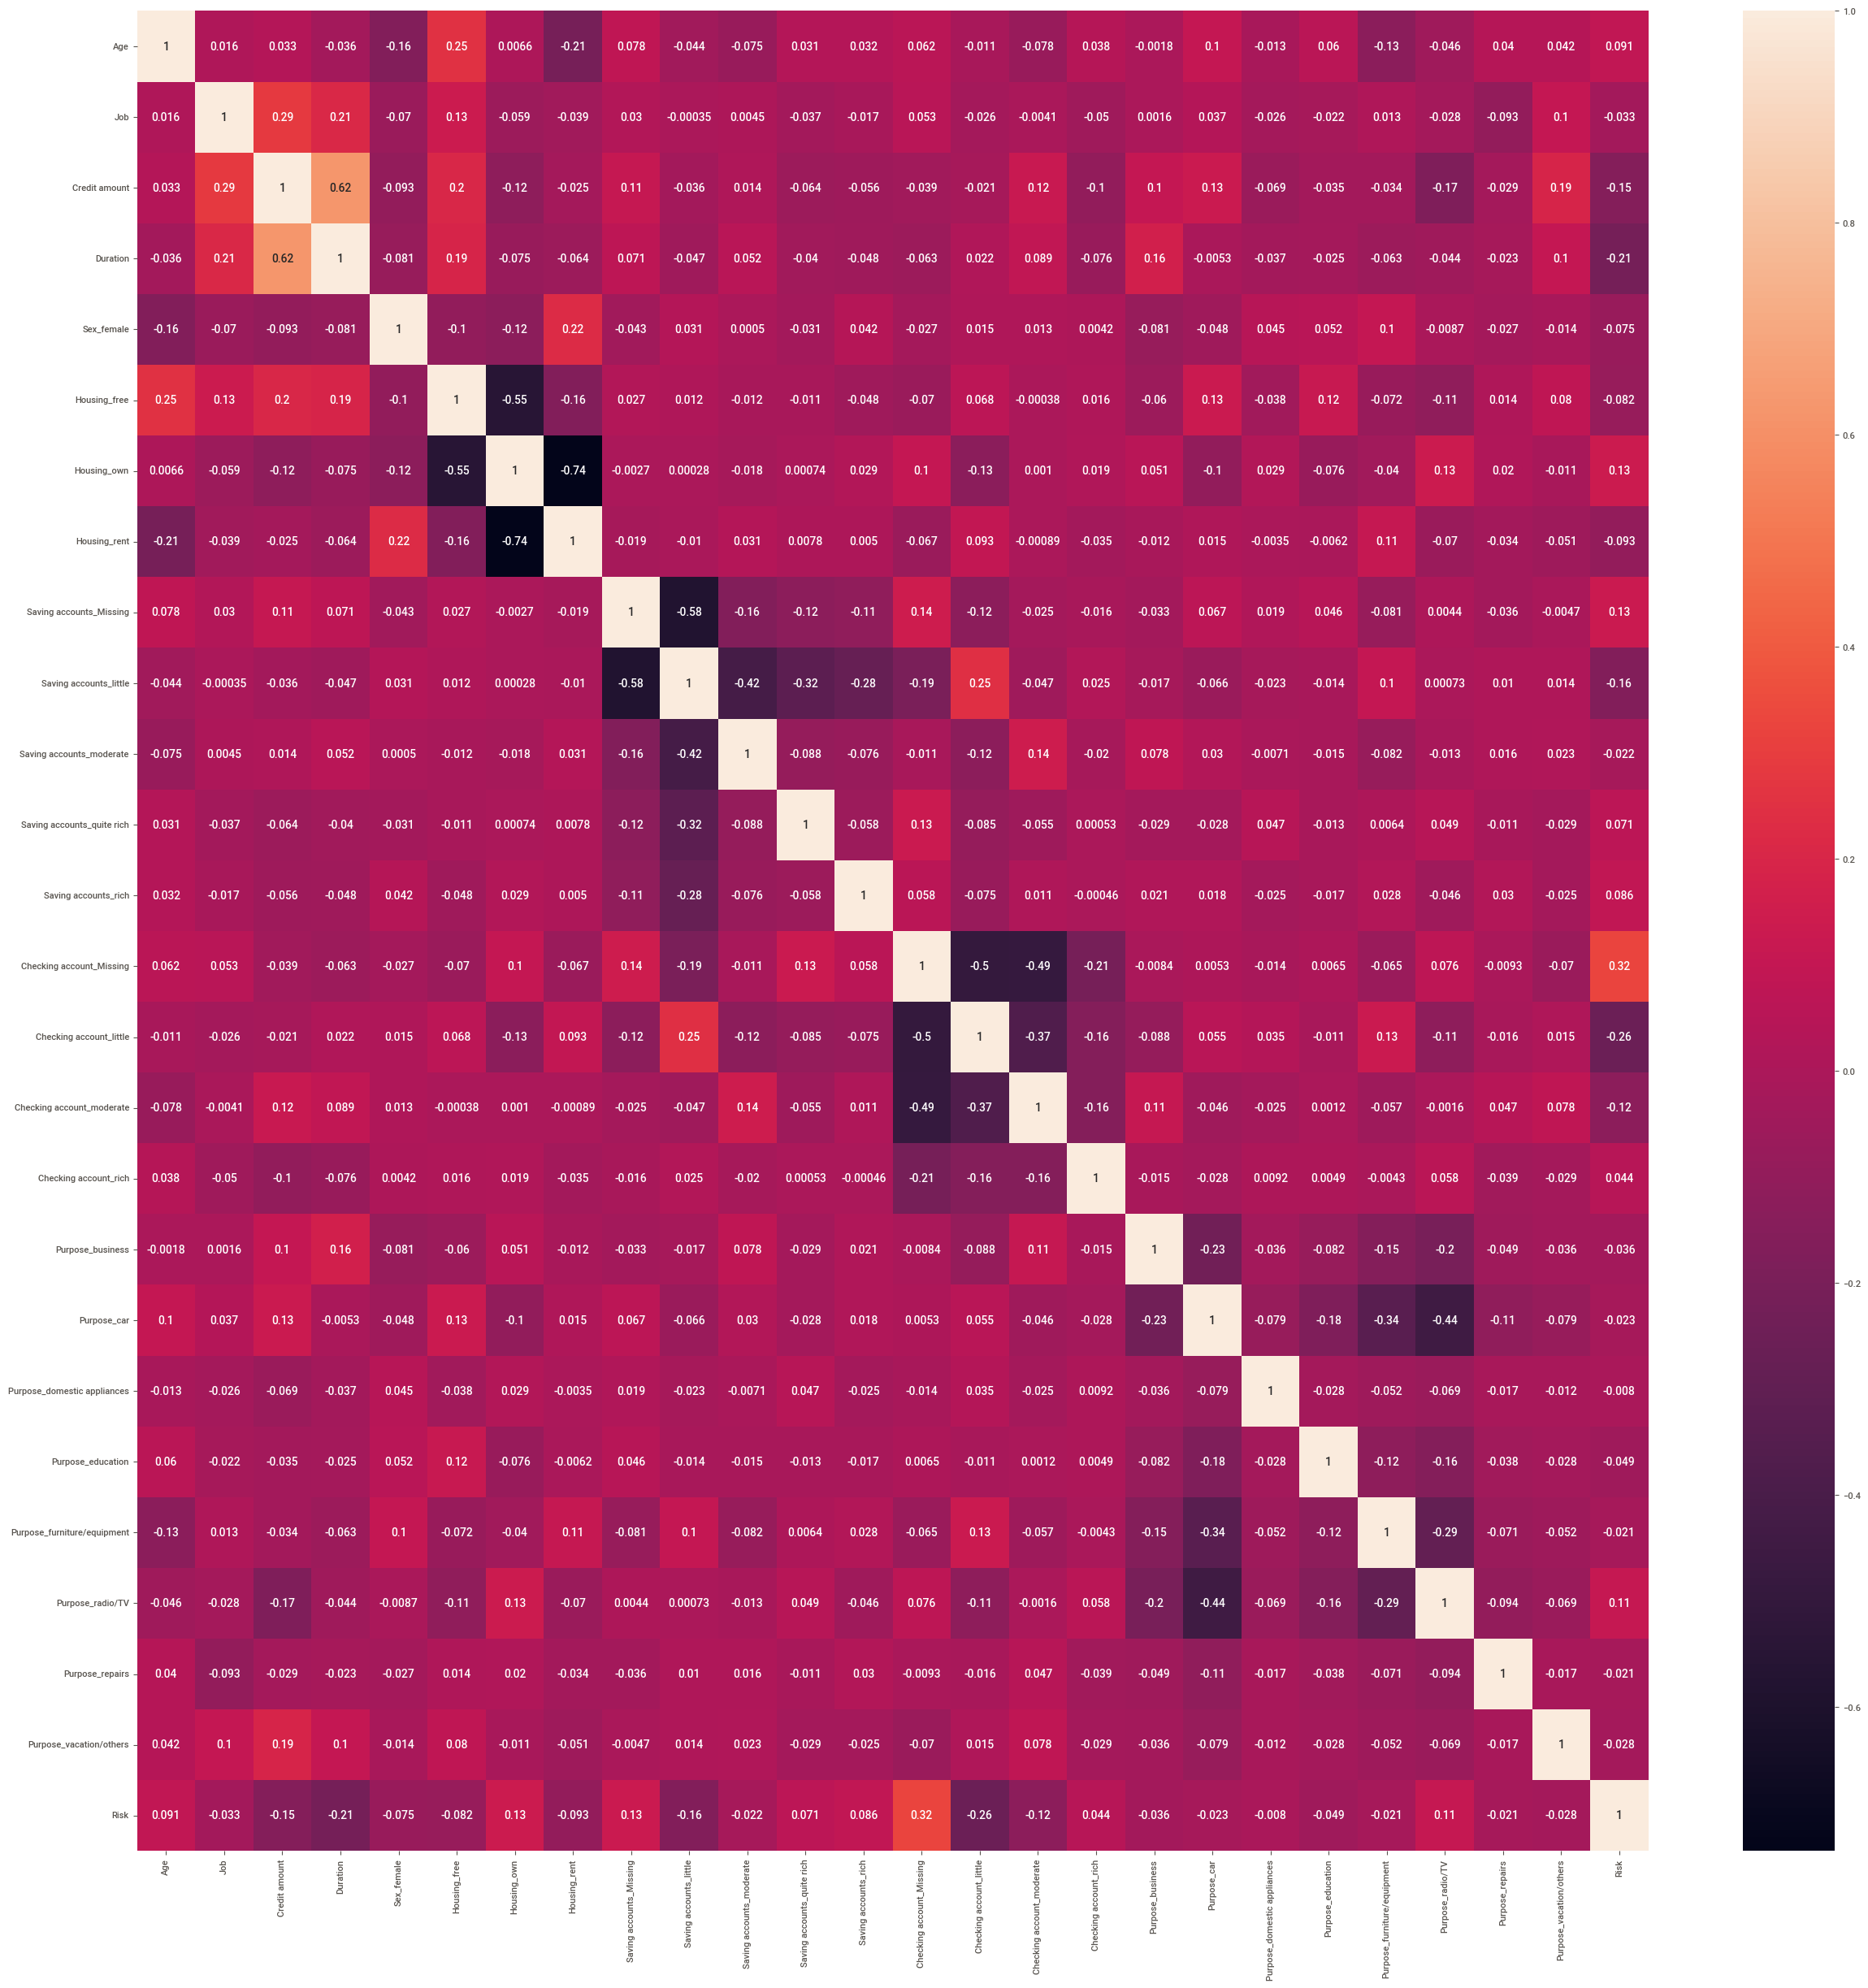

In [11]:
corr = df_encoded.corr()

plt.figure(figsize=(30,30))
_ = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

Note the big correlation between 'Duration' and 'Credit Amount'.